## **<center>D212 OFM3 Task 1:  CLUSTERING TECHNIQUES<center>** 

Julia Amanda Terzin  
ID:009968680  
Mentor: Linda Howel   
1-385-428-2729    
linda.howell@wgu.edu   
July 12, 2022

### Part I: Research Question

#### A. Describe the purpose of this data mining report by doing the following:

#### A.1. Propose one question relevant to a real-world organizational situation that you will answer using one of the following clustering techniques: • k-means • hierarchical


Will the clusters produced by applying k-means clustering to the continuous patient data provide insight into the differences in characteristics of patients who were readmitted and who were not readmitted?

#### A.2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

The medical data set contains data on 10,000 patients with demographic information, past medical history, medical data for hospital admission, hospital charges, and survey results. The objective of the analysis is to provide the hospital with a better understanding of the differences in characteristics of previous patients who were readmitted versus not readmitted.

### Part II: Technique Justification

#### B. Explain the reasons for your chosen clustering technique from part A1 by doing the following:

#### B.1. Explain how the clustering technique you chose analyzes the selected dataset. Include expected outcomes.

The technique I chose is k-means clustering. K-means clustering is an unsupervised machine learning algorithm that divides unlabeled data into groups with similarities. The number of clusters, k, is inputted by the user at the initiation of the analysis. The algorithm starts by randomly assigning k cluster centers or centroids.  It then iterates over the next three steps: 1) calculates the distance between the centroids and each data point. 2) assigns a label to each data point based on the closest centroid. 3) compute the mean of the data points for each centroid and update the centroid.  Iteration continues until the centroids no longer change or the number of iterations reaches a preset number. (Abbott, 2014)
The expected out is that the patients will be separated into 2 clusters, readmitted, and not readmitted.

#### B.2. Summarize one assumption of the clustering technique.

One of the assumptions of k-means clustering is that the clusters are spherical. The cluster center is the mean of all the points in the cluster. Therefore, it is important for the variables to be on the same scale.
(Inzaugarat, 2019)

#### B.3. List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

| Package/Library           | Application                         |
|---------------------------|-------------------------------------|
| pandas                    | Data manipulation and analysis      |
| numpy                     | Arrays and mathematical computation |
| matplotlib:               |                                     |
| pyplot                    | Visualizations                      |
| cm                        | Color maps for matplotlib           |
| seaborn                   | Visualizations                      |
| plotnine                  | Visualizations                      |
| yellowbrick.target:       |                                     |
| FeatureCorrelation        | Feature selection                   |
| sklearn.preprocessing:    |                                     |
| StandardScaler            | Scale numeric features              |
| sklearn.cluster:          |                                     |
| KMeans                    | perform KMeans clustering           |
| sklearn.metrics:          |                                     |
| silhouette_samples        | Computes the silhouette coefficient for each sample|
| silhouette_score          | Returns the mean Silhouette Coefficient over all samples     |
| feature_engine:           |                                     |
| OutlierTrimmer            | Find and drop outliers              |
| warnings                  | Suppress warnings                   |

### Part III: Data Preparation

#### C. Perform data preparation for the chosen dataset by doing the following

#### C.1. Describe one data preprocessing goal relevant to the clustering technique from part A1.

For k-means clustering, scaling the data is one of the most important preprocessing steps.  Otherwise, clustering will be biased towards higher magnitude variables. (Urbonas, n.d.) I will use sklearn's  StandardScaler to accomplish this task.

#### C.2. Identify the initial dataset variables that you will use to perform the analysis for the clustering question from part A1, and label each as continuous or categorical.

|  Name |  Data Type |  Variable Type|Description |  Example/Range  | Used in K-means|
|:---|:---|:---|:---|---:|---:|
|Income|float64| Quantitative/Continuous|Income of patient or insurance holder|154.08-207,249.13|No|
|VitD_levels|float64| Quantitative/Continuous|Lab value for Vitamin D level|9.519012-53.019124|No|
|Initial_days|float64| Quantitative/Continuous|Length of initial hospital stay| 1.001981- 71.981486|Yes|
|TotalCharge|float64| Quantitative/Continuous|Average daily charge. Total Amount/# of days. Does not include specialized treatments. Initial verses readmission not specified|1,256.751699- 2,1524.224210|Yes|
|Additional_charges|float64| Quantitative/Continuous|Average amount charged for "miscellaneous procedures, treatments, medicines, anesthesiology, etc". Initial verses readmission not specified|3,125.702716- 3,0566.073130|No|

#### C.3. Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

1.	Import packages
2.	Define functions to be used
3.	Load data
4.	Make a backup copy
5.	Examine the data set for shape, column name/count, and data types 
6.	Evaluate the dataset for missing values and duplicate rows
7.	Drop columns not applicable to the research question using the definitions provided in the data dictionary 
8.	Identify outliers, treat if needed
9.	Evaluate univariate and bivariate visualizations
10.	Check for correlation of features with readmission
11.	Standardize data


##### Import Packages

In [1]:
import pandas as pd
import numpy as np
from feature_engine.outliers import OutlierTrimmer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.target import FeatureCorrelation
import seaborn as sns
import plotnine as p9
import warnings

In [2]:
## Versions
print(pd.__version__)
print(np.__version__)

1.2.5
1.20.1


In [3]:
warnings.filterwarnings('ignore')

##### Functions

In [4]:
# Funtion for finding upper and lower outliers
#Returns df with outliers dropped
def out(df):

 # List of numbers columns
 num_cols = df.select_dtypes(include='number').columns
 
 #Find upper and lower outliers
 for col in num_cols:
     capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5,
     variables=[col])
     capper.fit(df)
     upper = capper.right_tail_caps_
     lower = capper.left_tail_caps_ 
 
     print(capper.right_tail_caps_)
     print(capper.left_tail_caps_)
     capped = capper.transform(df)
 
 return capped


In [5]:
#Function to plot histograms of categorical variables
#https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
def cat_hist(df):  
    # List of categorical columns
    cat_cols = df.select_dtypes('object').columns
    
    for col in cat_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
        
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12: 
            plt.figure(figsize = (4, 2))        
            sns.countplot(x=df[col], 
                          data=df, 
                          palette="Paired",
                          order = df[col].value_counts().index)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        else:
            sns.displot(df, x=df[col])
    return

In [6]:
#Function to plot distribution and boxplots of float variables
  #https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
def float_box(df):
    # List of float columns
    num_cols = df.select_dtypes('float').columns
    
    for col in num_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
              
        plt.figure(figsize = (6, 4))        
        sns.boxplot(x=df[col], 
                    data=df, 
                    palette="Paired")
        sns.displot(df, x=df[col])
        plt.title(title, fontsize = 18, pad = 12)
        plt.xlabel(column_name, fontsize = 15)
        plt.xticks(rotation=20)
        plt.ylabel("Frequency",fontsize = 15)
        plt.show();
        
    return

In [7]:
#Bivariate visualizations for numeric variables
def bi_vis_num(df):  
            
    #x = df.iloc[:,:-1]
    # List of numeric columns 
    num_cols = df.select_dtypes(include='number').columns
   
    #iterate over numeric columns
    for col in num_cols:
           
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'ReAdmis vs ' + column_name
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12:
            c = sns.catplot(y=col, hue= 'ReAdmis', kind="count", palette="pastel", data=df)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel('Count', fontsize = 16)
            plt.xticks(rotation=20)
            plt.ylabel(col,fontsize = 20)
            plt.show()
            
            
        else:
            # Subplot 1
            ax = sns.catplot(x=col, y= 'ReAdmis', kind="box", data=df)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel('ReAdmis', fontsize = 16)
            plt.xticks(rotation=0)
            plt.ylabel(col,fontsize = 20)
            plt.show()
            # Subplot 2 - Scatter plot xcol vs. ycol
            ax2 = print(p9.ggplot(df)+ p9.aes(x= col, fill= 'ReAdmis') + p9.geom_density(alpha=0.5))
            
            plt.tight_layout()
            plt.show()
        
    return

##### Load Data

In [8]:
df = pd.read_csv('c:/Users/jater/Downloads/D205/medical_clean212.csv')

In [9]:
df_copy = df.copy(deep=True)

##### Explore Data

In [10]:
df.shape

(10000, 50)

In [11]:
df.info() #Column names, data types, non-nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [12]:
df.isnull().sum() 

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe().transpose() #Numeric values- count, min, max, mean

,count,mean,std,min,25%,50%,75%,max
CaseOrder,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Zip,10000.0,50159.323900,27469.588208,610.000000,27592.000000,50207.000000,72411.750000,99929.000000
Lat,10000.0,38.751099,5.403085,17.967190,35.255120,39.419355,42.044175,70.560990
Lng,10000.0,-91.243080,15.205998,-174.209700,-97.352982,-88.397230,-80.438050,-65.290170
Population,10000.0,9965.253800,14824.758614,0.000000,694.750000,2769.000000,13945.000000,122814.000000
Children,10000.0,2.097200,2.163659,0.000000,0.000000,1.000000,3.000000,10.000000
Age,10000.0,53.511700,20.638538,18.000000,36.000000,53.000000,71.000000,89.000000
Income,10000.0,40490.495160,28521.153293,154.080000,19598.775000,33768.420000,54296.402500,207249.100000
VitD_levels,10000.0,17.964262,2.017231,9.806483,16.626439,17.951122,19.347963,26.394449
Doc_visits,10000.0,5.012200,1.045734,1.000000,4.000000,5.000000,6.000000,9.000000


In [15]:
df.describe(exclude='number').transpose() #Non-numeric values- count, #unique, most frequent

,count,unique,top,freq
Customer_id,10000,10000,N561877,1
Interaction,10000,10000,09d8bef7-3bf4-487d-995c-eb249a0b8bf2,1
UID,10000,10000,4661c5451a1fabb068361bde6e26417e,1
City,10000,6072,Houston,36
State,10000,52,TX,553
County,10000,1607,Jefferson,118
Area,10000,3,Rural,3369
TimeZone,10000,26,America/New_York,3889
Job,10000,639,Outdoor activities/education manager,29
Marital,10000,5,Widowed,2045


In [16]:
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [17]:
df.set_index('CaseOrder', drop = True, inplace = True)  #set index

In [18]:
df = df.drop(['Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng',
              'Population','Area','TimeZone','Job','Children','Age','Marital','Gender','Doc_visits', 
              'Full_meals_eaten','vitD_supp','Soft_drink','Initial_admin','HighBlood', 'Stroke', 
              'Complication_risk','Overweight', 'Arthritis', 'Diabetes','Hyperlipidemia','BackPain',
              'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma','Services', 'Item1',
              'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1) 

In [19]:
df.head()

,Income,ReAdmis,VitD_levels,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,
1,86575.93,No,19.141466,10.585770,3726.702860,17939.403420
2,46805.99,No,18.940352,15.129562,4193.190458,17612.998120
3,14370.14,No,18.057507,4.772177,2434.234222,17505.192460
4,39741.49,No,16.576858,1.714879,2127.830423,12993.437350
5,1209.56,No,17.439069,1.254807,2113.073274,3716.525786


##### Outliers

In [20]:
#Find upper and lower limits for outliers and return df with outlier rows
#Return df with outliners dropped as capped
capped= out(df)

{'Income': 106342.84374999999}
{'Income': -32447.666249999987}
{'VitD_levels': 23.430248331250006}
{'VitD_levels': 12.544152781249997}
{'Initial_days': 141.058227953}
{'Initial_days': -72.000993255}
{'TotalCharge': 13880.1883525}
{'TotalCharge': -3241.1145874999993}
{'Additional_charges': 27086.4933675}
{'Additional_charges': -3473.5156124999994}


In [21]:
# df without outliers
capped.describe()

,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
count,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000
mean,40485.740299,17.962751,34.473225,5308.332913,12252.918742
std,28577.394383,2.016336,26.286205,2177.431853,5806.643124
min,154.080000,9.806483,1.001981,1938.312067,3125.703000
25%,19633.220000,16.629871,7.933317,3180.581785,7843.023227
50%,33707.315000,17.946174,36.215360,5218.153500,11302.041845
75%,54211.370000,19.340687,61.130435,7452.330000,14823.206205
max,207249.100000,26.394449,71.981490,9180.728000,27059.629700


In [22]:
# Examine rows dropped for outliers
outliers = df[~df.index.isin(capped.index)]
outliers

,Income,ReAdmis,VitD_levels,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,
21,8686.47,No,19.374983,7.094503,3534.815016,28788.08031
82,6829.67,No,14.573324,8.652246,2846.148825,28102.95750
102,14057.58,No,19.687260,2.161241,3130.594194,28297.97033
103,79759.72,No,17.898182,9.779207,2977.031420,29021.25261
115,38725.35,No,17.084329,4.337468,2588.662209,28830.32716
...,...,...,...,...,...,...
9803,62899.19,Yes,19.392970,63.923510,7266.345000,28632.32000
9851,60929.88,Yes,18.715900,66.986960,8135.521000,27209.89000
9867,73217.24,Yes,20.385230,64.878830,8389.962000,27861.36000


In [23]:
#reorder columns
capped = capped[['Income', 'VitD_levels', 'Initial_days', 'TotalCharge',
       'Additional_charges', 'ReAdmis']]
capped.head()

,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges,ReAdmis
CaseOrder,,,,,,
1,86575.93,19.141466,10.585770,3726.702860,17939.403420,No
2,46805.99,18.940352,15.129562,4193.190458,17612.998120,No
3,14370.14,18.057507,4.772177,2434.234222,17505.192460,No
4,39741.49,16.576858,1.714879,2127.830423,12993.437350,No
5,1209.56,17.439069,1.254807,2113.073274,3716.525786,No


##### Visualizations

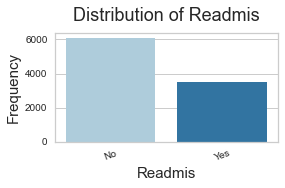

In [24]:
cat_hist(capped)

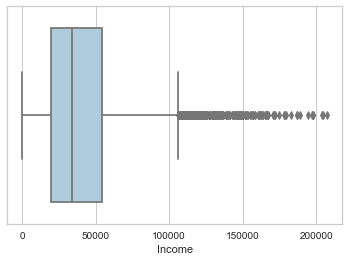

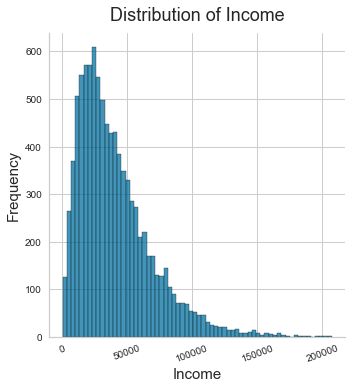

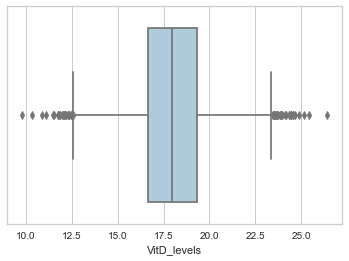

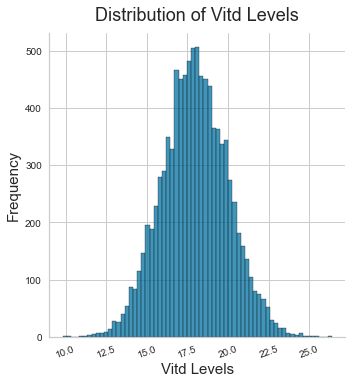

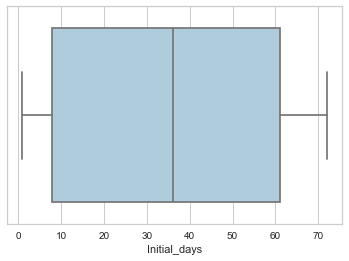

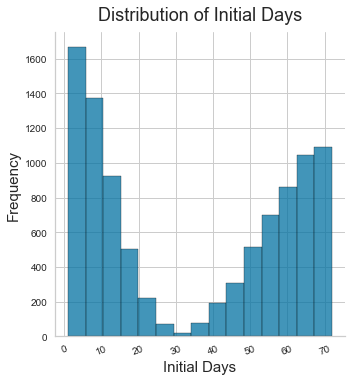

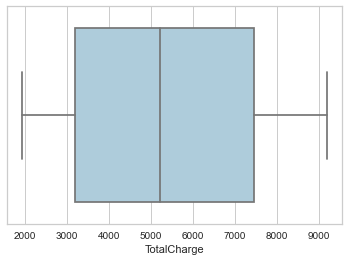

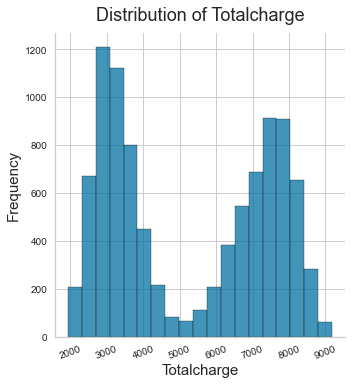

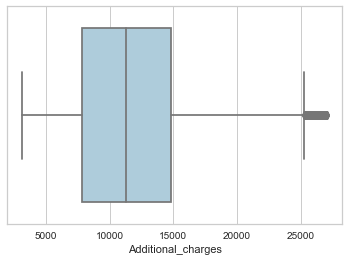

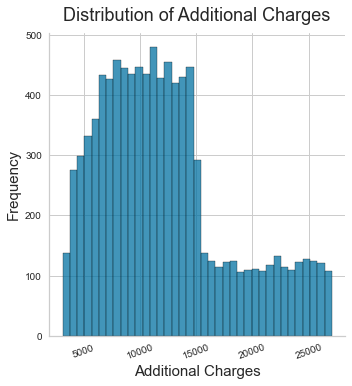

In [25]:
float_box(capped)

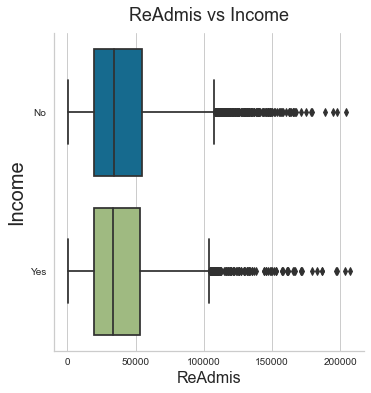

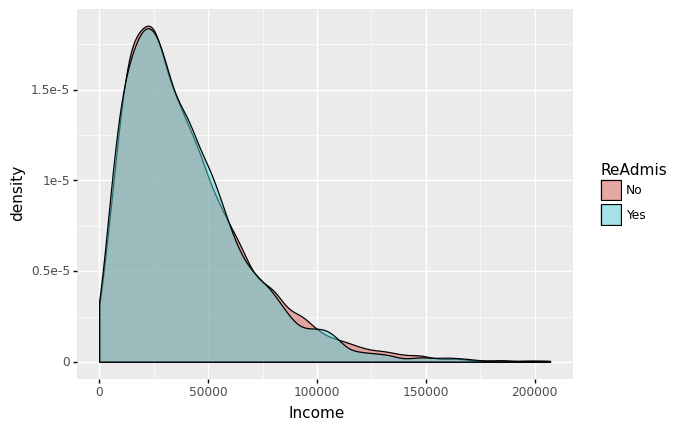

<Figure size 576x396 with 0 Axes>

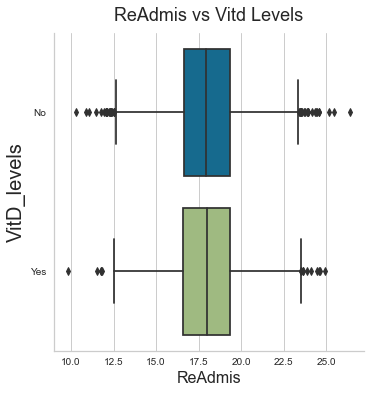

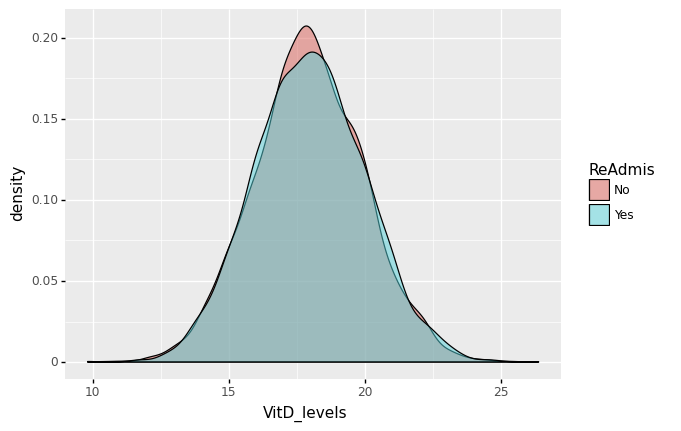

<Figure size 576x396 with 0 Axes>

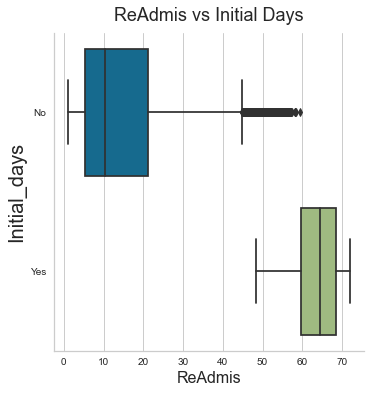

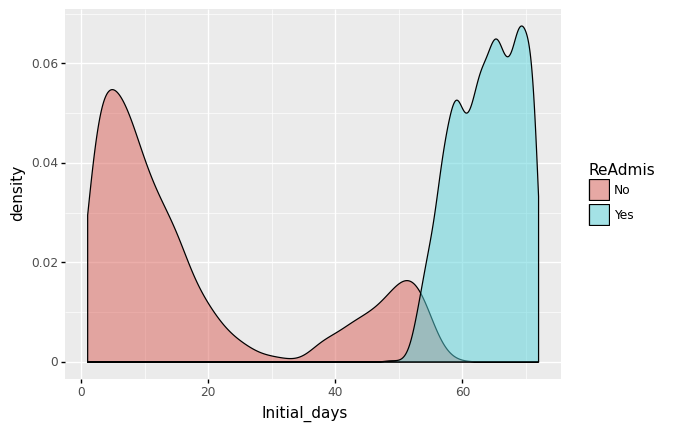

<Figure size 576x396 with 0 Axes>

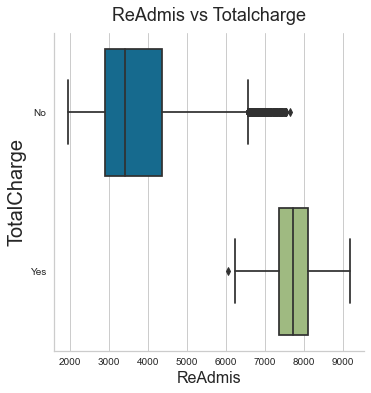

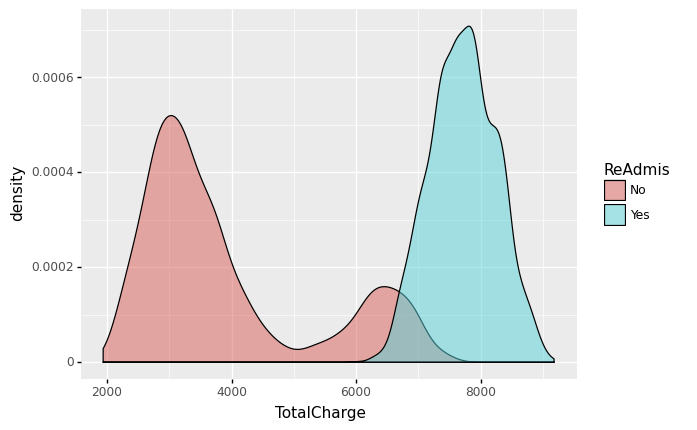

<Figure size 576x396 with 0 Axes>

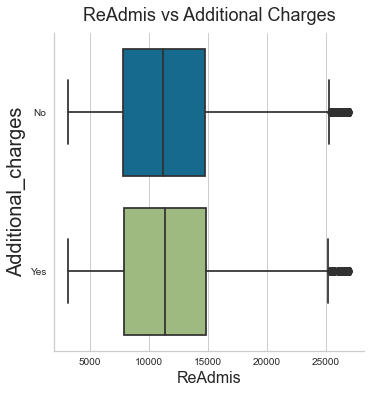

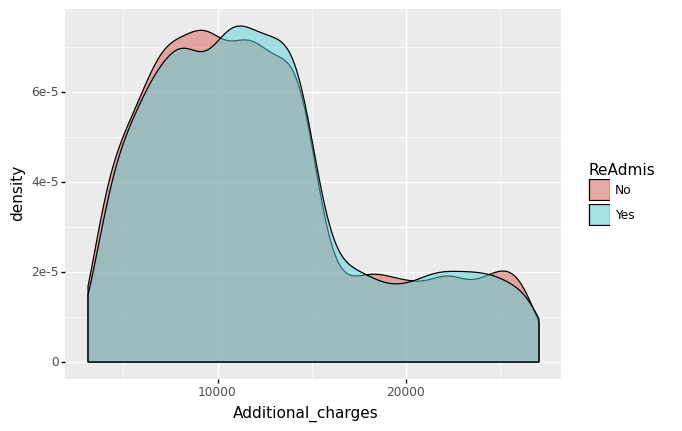

<Figure size 576x396 with 0 Axes>

In [26]:
bi_vis_num(capped)

##### Feature Selection

In [27]:
data = capped[['Income', 'VitD_levels', 'Initial_days', 'TotalCharge','Additional_charges']]
actual = capped[['ReAdmis']]

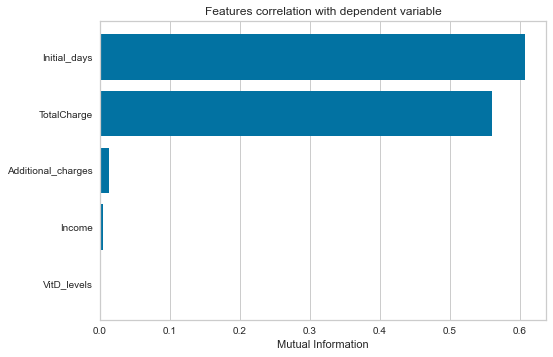

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Mutual Information'>

In [28]:
#(https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html)
# Create a list of the features to plot
features = ['Income', 'VitD_levels', 'Initial_days', 'TotalCharge', 'Additional_charges']

# Instaniate the visualizer
visualizer = FeatureCorrelation(
    method='mutual_info-classification', feature_names=features, sort=True
)

visualizer.fit(data, actual)        # Fit the data to the visualizer
visualizer.show()              # Finalize and render the figure

In [29]:
#Drop 'Income', 'VitD_levels', and'Additional_charges' for lack of correlation
features = capped.drop(['Income', 'ReAdmis', 'VitD_levels','Additional_charges'], axis=1)

##### Standardize Data

In [30]:
features_col = features.columns
features_col

Index(['Initial_days', 'TotalCharge'], dtype='object')

In [31]:
scaler =StandardScaler()
features_std = scaler.fit_transform(features)

In [32]:
print(features_std)

[[-0.90879236 -0.72641201]
 [-0.7359249  -0.5121633 ]
 [-1.12996906 -1.32001778]
 ...
 [ 1.35747316  1.36321285]
 [ 1.09887231  1.07294842]
 [ 1.3839679   1.18458576]]


In [33]:
print('mean: ', features_std.mean(axis=0).round(2))
print('std: ', features_std.std(axis=0).round(2))

mean:  [0. 0.]
std:  [1. 1.]


#### C.4. Provide a copy of the cleaned dataset.

In [34]:
cleaned_dataset = pd.DataFrame(features_std, index=features.index,columns=features_col)
cleaned_dataset.head()

,Initial_days,TotalCharge
CaseOrder,,
1,-0.908792,-0.726412
2,-0.735925,-0.512163
3,-1.129969,-1.320018
4,-1.246283,-1.460743
5,-1.263787,-1.467521


In [35]:
cleaned_dataset.to_csv('D212Task1clean.csv')

### Part IV: Analysis

#### D. Perform the data analysis and report on the results by doing the following:

#### D.1. Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

I used k-means clustering for my analysis. K-means works best with continuous variables, so I chose the continuous data from the data set as features.  Since outliers and differently scaled data will bias the results, outliers were removed, and the data were rescaled. To reduce the number of features, features without correlation with readmission were dropped. Only Initial_days and TotalCharge had any relevance.  Once the data were properly prepared, I used the elbow method and silhouette score to find the optimal k. The elbow plot revealed a sharp bend at 2. The silhouette score was highest, 0.8,  at k=2 as well. The analysis was then run with k = 2.   The clusters were visualized with a silhouette and scatter plot.  The clusters were further analyzed by adding the cluster labels as a column to the non-scaled 'features' DataFrame as well as the 'ReAdmis' column from the original DataFrame in a new DataFrame called patients. 'Get_dummies' was applied to the "ReAdmis" column and the statistics of the clusters were evaluated. (Nwanganga, 2022) The results are discussed below. 

#### D.2. Provide the code used to perform the clustering analysis technique from part 2.

##### Find the optimal K

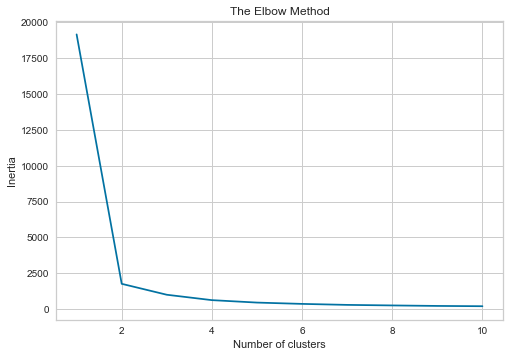

In [36]:
# Evaluate optimal K
# (Banerjee, 2020)
Inertia = []
for i in range(1, 11):
    kmeans_factors = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_factors.fit(features_std)
    Inertia.append(kmeans_factors.inertia_)
plt.plot(range(1, 11), Inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

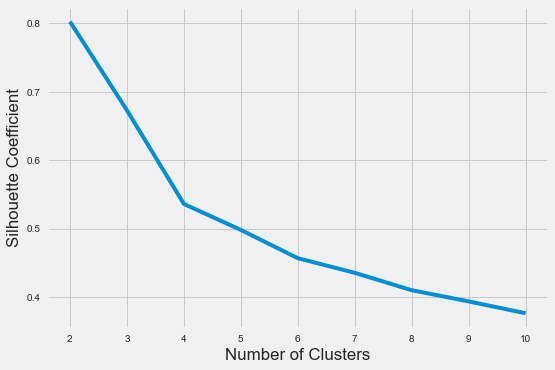

In [37]:
# A list holds the silhouette coefficients for each k
#https://realpython.com/k-means-clustering-python/
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(features_std)
    score = silhouette_score(features_std, kmeans.labels_)
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()    
    

<font color="blue">**Both methods show k = 2 is the best value for k**</font>

##### KMeans cluster with K=2

In [38]:
model = KMeans(n_clusters=2, random_state = 0)
model.fit(features_std) 

KMeans(n_clusters=2, random_state=0)

In [39]:
cluster_labels = model.labels_

In [40]:
print(cluster_labels)

[0 0 0 ... 1 1 1]


##### Visualize and evaluate clusters

The average silhouette_score is : 0.8027165264098817


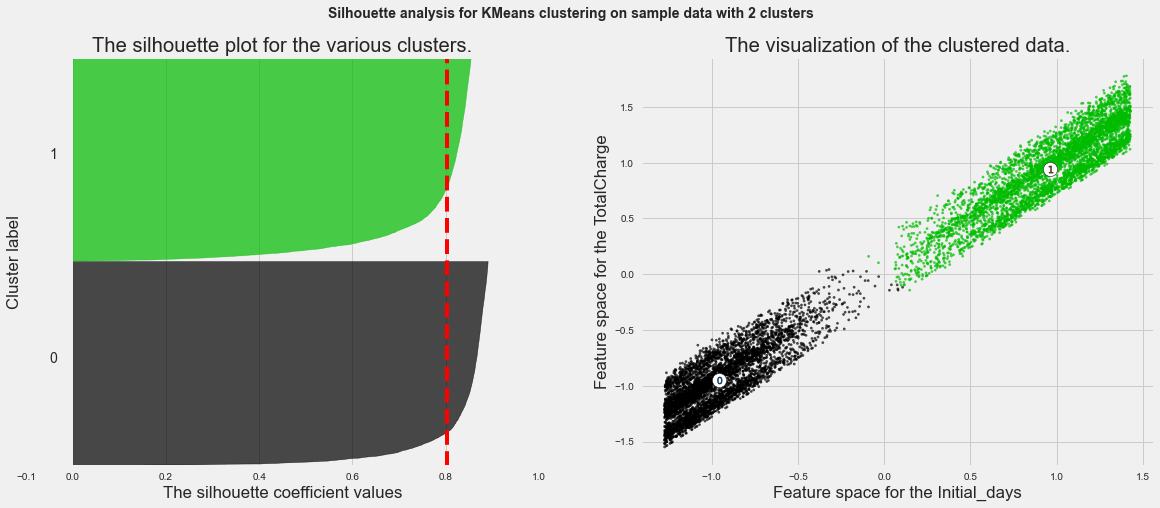

In [41]:
#Silhouette and Scatter plot of analysis
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(features_std) + (3)])

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(features_std, cluster_labels)
print(
    "The average silhouette_score is :",
    silhouette_avg,
)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(features_std, cluster_labels)

y_lower = 10
for i in range(2):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 2)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / 2)
ax2.scatter(
    features_std[:, 0], features_std[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = model.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the Initial_days")
ax2.set_ylabel("Feature space for the TotalCharge")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with 2 clusters",
    fontsize=14,
    fontweight="bold",
)

plt.show()

##### Apply clusters to original data

In [42]:
# Add cluster labels to original unscaled data
patients = features.copy(deep=True)
patients['Cluster'] = model.labels_.tolist()
patients.head()

,Initial_days,TotalCharge,Cluster
CaseOrder,,,
1,10.585770,3726.702860,0
2,15.129562,4193.190458,0
3,4.772177,2434.234222,0
4,1.714879,2127.830423,0
5,1.254807,2113.073274,0


In [43]:
# Add 'ReAdmis' column
patients['ReAdmis'] = actual['ReAdmis']
patients.head()

,Initial_days,TotalCharge,Cluster,ReAdmis
CaseOrder,,,,
1,10.585770,3726.702860,0,No
2,15.129562,4193.190458,0,No
3,4.772177,2434.234222,0,No
4,1.714879,2127.830423,0,No
5,1.254807,2113.073274,0,No


In [44]:
# Get dummy variables for 'ReAdmis' column
patients = pd.get_dummies(patients, columns = ['ReAdmis'])
patients.head()

,Initial_days,TotalCharge,Cluster,ReAdmis_No,ReAdmis_Yes
CaseOrder,,,,,
1,10.585770,3726.702860,0,1,0
2,15.129562,4193.190458,0,1,0
3,4.772177,2434.234222,0,1,0
4,1.714879,2127.830423,0,1,0
5,1.254807,2113.073274,0,1,0


##### Evaluate the statistics of the clusters applied to the original data

In [45]:
# Overall statistics 
patients.describe(percentiles = [0.5], include = 'all').transpose()

,count,mean,std,min,50%,max
Initial_days,9576.0,34.473225,26.286205,1.001981,36.21536,71.98149
TotalCharge,9576.0,5308.332913,2177.431853,1938.312067,5218.15350,9180.72800
Cluster,9576.0,0.500000,0.500026,0.000000,0.50000,1.00000
ReAdmis_No,9576.0,0.633876,0.481769,0.000000,1.00000,1.00000
ReAdmis_Yes,9576.0,0.366124,0.481769,0.000000,0.00000,1.00000


In [46]:
# Statistics by cluster
patients.groupby('Cluster').agg({
    'ReAdmis_No': 'mean',
    'ReAdmis_Yes': 'mean',
    'Initial_days': 'median',
    'TotalCharge': 'median'}).round(2)

,ReAdmis_No,ReAdmis_Yes,Initial_days,TotalCharge
Cluster,,,,
0,1.00,0.00,7.93,3180.52
1,0.27,0.73,61.13,7452.40


<font color="blue">**Cluster 0 are all patients that were not readmitted. Cluster 1 has 73% readmitted patients. The median for 'Initial_days' and "TotalCharge' is significantly different between the 2 clusters.**</font>

##### Apply the clusters to all of the medical-related variables

<font color="blue">**Let's see if applying the clusters to all of the medical-related variables reveals any other differences in the characteristics between the 2 clusters**</font> (Nwanganga, 2022)

In [47]:
# Obtain the original data from copy
df1 = df_copy.copy(deep=True)
df1.set_index('CaseOrder', drop = True, inplace = True)
df1 = df1.drop(['Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng',
              'Population','Area','TimeZone','Job','Children', 'Item1',
              'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
df1.head()         

,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420
2,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120
3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460
4,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350
5,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786


In [48]:
# Select same patients by index
index = capped.index
index1 = index.tolist()
df1 = df1.loc[index1]
df1.head()

,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420
2,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120
3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460
4,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350
5,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786


In [49]:
# Check to make sure proper rows are chosen
df1['Initial_days'].equals(patients['Initial_days'])
df1['TotalCharge'].equals(patients['TotalCharge'])

True

In [50]:
# Get dummies
df1 = pd.get_dummies(df1, columns = ['Marital', 'Gender', 'ReAdmis', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services'])
df1.head()

,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,ReAdmis_No,ReAdmis_Yes,Soft_drink_No,Soft_drink_Yes,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,HighBlood_No,HighBlood_Yes,Stroke_No,Stroke_Yes,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Overweight_No,Overweight_Yes,Arthritis_No,Arthritis_Yes,Diabetes_No,Diabetes_Yes,Hyperlipidemia_No,Hyperlipidemia_Yes,BackPain_No,BackPain_Yes,Anxiety_No,Anxiety_Yes,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0
2,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0
3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
4,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0
5,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0


In [51]:
# Add cluster labels
df1['Cluster'] = model.labels_.tolist()
df1.head()

,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,ReAdmis_No,ReAdmis_Yes,Soft_drink_No,Soft_drink_Yes,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,HighBlood_No,HighBlood_Yes,Stroke_No,Stroke_Yes,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Overweight_No,Overweight_Yes,Arthritis_No,Arthritis_Yes,Diabetes_No,Diabetes_Yes,Hyperlipidemia_No,Hyperlipidemia_Yes,BackPain_No,BackPain_Yes,Anxiety_No,Anxiety_Yes,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI,Cluster
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,0
2,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0
3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
4,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0
5,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0


In [52]:
# Get stats by cluster group
df1.groupby('Cluster').agg({
   'ReAdmis_No': 'mean',
    'ReAdmis_Yes': 'mean',
    'Marital_Divorced': 'mean',
    'Marital_Married': 'mean',
    'Marital_Never Married': 'mean',
    'Marital_Separated': 'mean',
    'Marital_Widowed': 'mean',
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Gender_Nonbinary': 'mean',
    'Soft_drink_No': 'mean',
    'Soft_drink_Yes': 'mean',
    'Initial_admin_Elective Admission': 'mean',
    'Initial_admin_Emergency Admission': 'mean',
    'Initial_admin_Observation Admission': 'mean',
    'HighBlood_No': 'mean',
    'HighBlood_Yes': 'mean',
    'Stroke_No': 'mean',
    'Stroke_Yes': 'mean',
    'Complication_risk_High': 'mean',
    'Complication_risk_Low': 'mean',
    'Complication_risk_Medium': 'mean',
    'Overweight_No': 'mean',
    'Overweight_Yes': 'mean',
    'Arthritis_No': 'mean',
    'Arthritis_Yes': 'mean',
    'Diabetes_No': 'mean',
    'Diabetes_Yes': 'mean',
    'Hyperlipidemia_No': 'mean',
    'Hyperlipidemia_Yes': 'mean',
    'BackPain_No': 'mean',
    'BackPain_Yes': 'mean',
    'Anxiety_No': 'mean',
    'Anxiety_Yes': 'mean',
    'Allergic_rhinitis_No': 'mean',
    'Allergic_rhinitis_Yes': 'mean',
    'Reflux_esophagitis_No': 'mean',
    'Reflux_esophagitis_Yes': 'mean',
    'Asthma_No': 'mean',
    'Asthma_Yes': 'mean',
    'Services_Blood Work': 'mean',
    'Services_CT Scan': 'mean',
    'Services_Intravenous': 'mean',
    'Services_MRI': 'mean',
    'Doc_visits': 'median',
    'Full_meals_eaten': 'median',
    'vitD_supp': 'median',
    'Age': 'median',
    'Income': 'median',
    'VitD_levels': 'median',
    'Initial_days': 'median',
    'Additional_charges': 'median',
    'TotalCharge': 'median'}).round(2).transpose()

Cluster,0,1
ReAdmis_No,1.00,0.27
ReAdmis_Yes,0.00,0.73
Marital_Divorced,0.21,0.19
Marital_Married,0.20,0.20
Marital_Never Married,0.19,0.20
Marital_Separated,0.20,0.20
Marital_Widowed,0.20,0.21
Gender_Female,0.51,0.50
Gender_Male,0.47,0.48
Gender_Nonbinary,0.02,0.02


<font color="blue">**No significate difference between the 2 clusters in any of the additional medical variables**</font>

### Part V: Data Summary and Implications

#### E. Summarize your data analysis by doing the following:
#### E.1. Explain the accuracy of your clustering technique.

To evaluate the quality of k-means clusters in unsupervised learning, the silhouette method is commonly used to evaluate how similar the data in each cluster is and how well the different clusters are separated.  It is calculated by first finding the mean distance between data points within each cluster(a) and the mean distance between data points and all other data points of the next closest cluster(b). The formula (b-a)/max(a,b) gives the silhouette score that ranges from -1 to 1. The silhouette score is calculated for each point in the data set and then the average of the results is made. A score of 1 is the best score and indicates the cluster is dense and well separated from other clusters. Scores close to 0 show that the clusters are not well separated, and data points close to the decision boundary may be assigned to the wrong cluster. Scores closer to -1 indicate that data is not clustered well at all. The average silhouette score for my analysis is 0.8, which indicates fairly good density and separation of the clusters. (Kumar, 2020)

#### E.2. Discuss the results and implications of your clustering analysis.

Once the clusters were identified, I evaluated whether or not they provided any insight into readmitted patients. Cluster 0 contained 0% readmitted patients and cluster 1 contained 73% readmitted patients. The median for 'Initial_days' and "TotalCharge' was significantly different between the 2 clusters.  I then applied the cluster labels to the original data not included in the initial clustering to see if the two clusters could be further characterized. The additional categorical and numeric data were essentially the same between the 2 clusters. (Nwanganga, 2022)

The implications of the analysis are that clusters of patients with higher values of "Initial_days" and "TotalCharge" have a much higher percentage of readmitted patients. This information is not very helpful in practice as "Initial_days" and "TotalCharge" are more of an effect rather than a cause. It does not satisfy the stated purpose of the hospital to "better understand its patients’ characteristics" to be able to better " target treatment to patients, resulting in more effective cost of care for the hospital in the long term". It does however demonstrate the additional cost of higher LOS and readmitted patients and further supports decision-making by showing the opportunity to reduce costs with reduced LOS and readmission.


#### E.3. Discuss one limitation of your data analysis.

One limitation of my cluster analysis is that k-means clustering does not perform well with categorical data. (Abbott, 2014)  In the medical data set,  most of the medically relevant variables are binary categorical. 

#### E.4. Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2

If the stakeholders would like a more meaningful cluster analysis of the patients, I would recommend adding additional continuous data points that have better medical severity insight.  Lab values that show how well a diabetic's blood sugar is being managed, cardiac markers and ejection fraction that quantify heart function, body mass index to quantify obesity, and lipid panel results to quantify hyperlipidemia are just a few data points that would stratify their medical profile with greater specificity.

### Part VI: Demonstration

#### F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.    
     
     

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d7cd7fd4-b7f9-46d1-9e33-aed00162727b

#### G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

https://www.linkedin.com/learning/machine-learning-with-python-k-means-clustering/how-to-interpret-the-results-of-k-means-clustering-in-python?autoplay=true&u=2045532

https://realpython.com/k-means-clustering-python/

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html

https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3

#### H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

Abbott, Dean. (2014). Applied predictive analytics: Principles and techniques for the professional data analyst. John Wiley & Sons, Incorporated. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/westerngovernors-ebooks/detail.action?docID=1662190.

Banerjee, Prashant. 2020. K-Means Clustering with Python. https://www.kaggle.com/code/prashant111/k-means-clustering-with-python/notebook

Inzaugarat, Euge. 2019. Using machine learning to understand customers' behavior.
https://towardsdatascience.com/using-machine-learning-to-understand-customers-behavior-f41b567d3a50

Kumar, Ajitesh. 2020.  KMeans Silhouette Score Explained with Python Example.  https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/

Nwanganga, Frederick. 2022. Machine Learning with Python: k-Means Clustering, How to interpret the results of k-means clustering in Python.
https://www.linkedin.com/learning/machine-learning-with-python-k-means-clustering/how-to-interpret-the-results-of-k-means-clustering-in-python?autoplay=true&u=2045532


Urbonas, Karolis. (n.d.). https://campus.datacamp.com/courses/customer-segmentation-in-python/data-pre-processing-for-clustering?ex=1